In [78]:
# Load general python modules
import importlib
import numpy as np
import matplotlib.pyplot as plt

# Load user modules
import lorenz63
importlib.reload(lorenz63) # For debugging!

<module 'lorenz63' from 'C:\\Users\\florianb\\Documents\\Lorenz63\\lorenz63.py'>

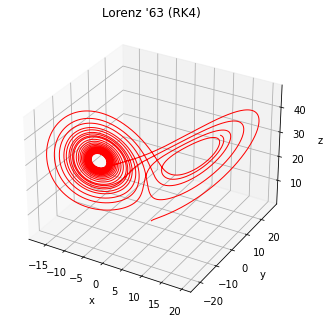

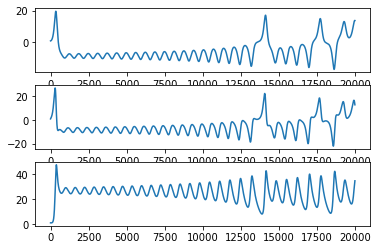

In [79]:
lorenz63_params_model = { "p" : 10.0, "r" : 28.0, "b" : 8.0/3.0 }
lorenz63_params_num   = { "tmax" : 20.0, "dt" : 1e-3 }

lorenz63 = lorenz63.lorenz63( **lorenz63_params_model, **lorenz63_params_num )
lorenz63.simulate( [1,1,1] )
lorenz63.plot3D()
lorenz63.plot()

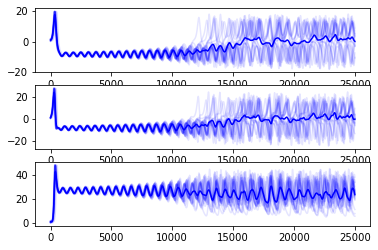

In [69]:
#Load user modu
import ensemble 
importlib.reload(ensemble)

ensemble = ensemble.ensemble(lorenz63,20)
ensemble.simulate()
ensemble.mean()
ensemble.plot()

In [ ]:
x = lorenz63.getTimeSeries(0)
plt.plot( range(len(x)), x )
plt.show()

y = lorenz63.getTimeSeries(1)
plt.plot( range(len(x)), y )
plt.show()

z = lorenz63.getTimeSeries(2)
plt.plot( range(len(x)), z )
plt.show()